In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [50]:
import pandas as pd 
import numpy as np
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from warnings import filterwarnings
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
filterwarnings(action = 'ignore')
%matplotlib inline

In [63]:
raw = pd.read_csv('Computer_Hardware.csv')
df = deepcopy(raw) 

In [64]:
display(df.sample(3), df.isna().sum(), df.info(memory_usage='deep'), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Seller Name                        208 non-null    object
 1   Model Name                         208 non-null    object
 2   Machine Cycle Time in nanoseconds  208 non-null    int64 
 3   Minimum Main Memory in Kilobytes   208 non-null    int64 
 4   Maximum Main Memory in kilobytes   208 non-null    int64 
 5   Cache Memory in Kilobytes          208 non-null    int64 
 6   Minimum Channels in Units          208 non-null    int64 
 7   Maximum Channels in Units          208 non-null    int64 
 8   Published Relative Performance     208 non-null    int64 
 9   Estimated Relative Performance     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 38.8 KB


,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
120,ibm,4381-2,17,4000,16000,32,6,12,133,116
16,burroughs,b2900,143,512,5000,0,7,32,28,29


Seller Name                          0
Model Name                           0
Machine Cycle Time in nanoseconds    0
Minimum Main Memory in Kilobytes     0
Maximum Main Memory in kilobytes     0
Cache Memory in Kilobytes            0
Minimum Channels in Units            0
Maximum Channels in Units            0
Published Relative Performance       0
Estimated Relative Performance       0
dtype: int64

None

,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


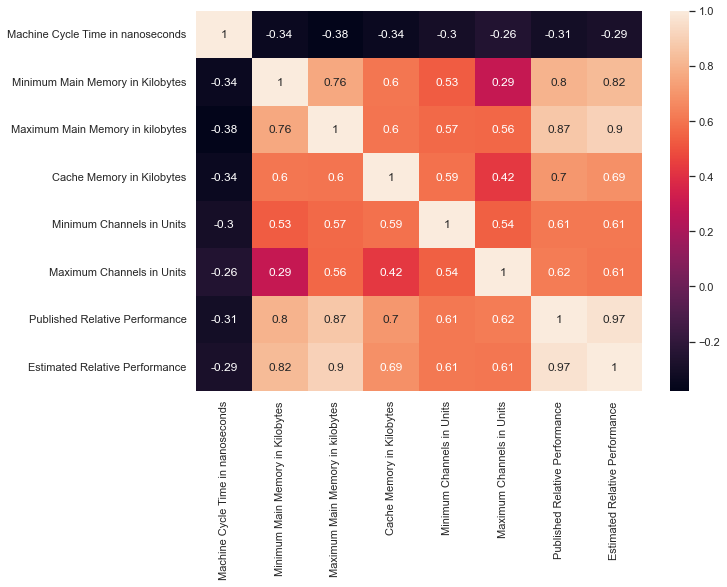

In [65]:
#Checking correlation before modeling
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), annot=True)
plt.show()

In [66]:
df = df.iloc[:, 2:]

In [68]:
scaler = RobustScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df = pd.DataFrame(df)  

In [70]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((176, 7), (176,), (32, 7), (32,))

In [75]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

In [76]:
preds

array([ 43.624588,  29.790998,  45.04387 ,  69.17178 , 114.779045,
        20.635174,  24.26679 , 317.6315  , 253.66891 ,  43.2367  ,
        94.417366,  46.34225 , 406.74045 ,  39.608425, 110.56453 ,
        27.344276,  90.723465, 188.62042 ,  38.520668,  44.667603,
       302.7334  ,  55.434673,  18.775394,  43.242096,  27.586058,
        59.983635,  20.642187, 179.39777 ,  31.120132,  75.54712 ,
        76.29494 , 177.38655 ], dtype=float32)

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
r_2 = xgb_model.score(X_test, y_test)
print(f'Root mean squared error: {rmse}')
print(f'R squared: {r_2}')
print(f'On train: {xgb_model.score(X_train, y_train)}')

Root mean squared error: 19.48258907571854
R squared: 0.9572447993301892
On train: 0.9999999895159526
